# CAPSTONE PROJECT REPORT

## Introduction & Business Problem :

### Problem Background:

The City of Paris , is the most populous city in the France. It is diverse and is the financial capital of France. It is multicultural. It provides lot of business oppourtunities and business friendly environment. It has attracted many different players into the market. It is a global hub of business and commerce. The city is a major center for banking and finance, retailing, world trade, transportation, tourism, real estate, new media, traditional media, advertising, legal services, accountancy, insurance, theater, fashion, and the arts in the France.

This also means that the market is highly competitive. As it is highly developed city so cost of doing business is also one of the highest. Thus, any new business venture or expansion needs to be analysed carefully. The insights derived from analysis will give good understanding of the business environment which help in strategically targeting the market. This will help in reduction of risk. And the Return on Investment will be reasonable.

### Problem Description:

A restaurant is a business which prepares and serves food and drink to customers in return for money, either paid before the meal, after the meal, or with an open account. The City of Paris is famous for its excelllent cuisine. It's food culture includes an array of international cuisines influenced by the city's immigrant history.

* Central and Eastern European immigrants, especially Jewish immigrants - bagels, cheesecake, hot dogs, knishes, and delicatessens
* Italian immigrants - Paris York-style pizza and Italian cuisine
* Jewish immigrants and Irish immigrants - pastrami and corned beef
* Chinese and other Asian restaurants, sandwich joints, trattorias, diners, and coffeehouses are ubiquitous throughout the city
* Mobile food vendors - Some 4,000 licensed by the city
* Middle Eastern foods such as falafel and kebabs examples of modern New York street food7
* It is famous for not just Pizzerias, Cafe's but also for fine dining Michelin starred restaurants.

So it is evident that to survive in such competitive market it is very important to startegically plan. Various factors need to be studied inorder to decide on the Location such as :

* Paris Population
* Paris city Demographics
* Are there any Farmers Markets, Wholesale markets etc nearby so that the ingredients can be purchased fresh to maintain quality and cost?
* Are there any venues like Gyms, Entertainmnet zones, Parks etc nearby where floating population is high etc
* Who are the competitors in that location?
* Cuisine served / Menu of the competitors
* Segmentation of the Borough
* Untapped markets
* Saturated markets etc The list can go on...

Even though well funded Bellefull Company Ltd. need to choose the correct location to start its first venture.If this is successful they can replicate the same in other locations. First move is very important, thereby choice of location is very important.

### Target Audience:

To recommend the correct location, Bellefull Company Ltd has appointed me to lead of the Data Science team. The objective is to locate and recommend to the management which neighborhood of Paris will be best choice to start a restaurant. The Management also expects to understand the rationale of the recommendations made.

This would interest anyone who wants to start a new restaurant in Paris.

### Success Criteria:

The success criteria of the project will be a good recommendation of borough/Neighborhood choice to Bellefull Company Ltd based on lack of such restaurants in that location and nearest suppliers of ingredients.

# Data Section

The main districts in Paris are divided into 20 Arrondissements Municipaux (administrative districts), shortened to arrondissements.

The data regarding the districts in Paris needs to be researched and a suitable useable source identified. If it is found but is not in a useable form, data wrangling and cleaning will have to be performed.

The cleansed data will then be used alongside Foursquare data, which is readily available. Foursquare location data will be leveraged to explore or compare districts around Paris, identifying the high traffic areas where consumers go for shopping, dining and entertainment - the areas where the fashion brand are most interested in opening new stores.

#### Outline the initial data that is required:
* District data for Paris including names, location data if available, and any other details required.
#### Obtain the Data:
* Research and find suitable sources for the district data for Paris.
* Access and explore the data to determine if it can be manipulated for our purposes.
#### Initial Data Wrangling and Cleaning:
* Clean the data and convert to a useable form as a dataframe.

# Methodology and Exploratory Data Analysis

### The Data Science Workflow for parts 3 & 4 includes:

### Data Analysis and Location Data:

* Foursquare location data will be leveraged to explore or compare districts around Paris.

* Data manipulation and analysis to derive subsets of the initial data.

* Identifying the high traffic areas using data visualisation and tatistical nalysis.

### Visualization:

* Analysis and plotting visualizations.

* Data visualization using various mapping libraries.

### Discussion and Conclusions:

* Recomendations and results based on the data analysis.

* Discussion of any limitations and how the results can be used, and any conclusions that can be drawn.

# Data Research and Preparation

## Import the Paris District Data

### Arrondissements Municipaux for Paris CSV (administrative districts)

Paris is divided into 20 Arrondissements Municipaux (or administrative districts), shortened to just arrondissements. They and normally referenced by the arrondissement number rather than a name.

Data for the arrondissements is necessary to select the most suitable of these areas for new stores.

Initially looking to get this data by scraping the relevent Wikipedia page (https://en.wikipedia.org/wiki/Arrondissements_of_Paris), fortunately, after much research, this data is available on the web and can be manipulated and cleansed to provide a meaningful dataset to use.

Data from Open|DATA France: https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart

Also available from Opendatasoft: https://data.opendatasoft.com/explore/dataset/arrondissements%40parisdata/export/

#### Create a map of Paris with districts superimposed

In [8]:
# create map of Paris using the above latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(paris['Latitude'], paris['Longitude'], paris['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

## Use the Foursquare API to explore the Arrondissements of Paris (Neighborhoods)


#### Define Foursquare Credentials and Version

In [9]:
CLIENT_ID = 'RU3Y3XCL1D3X4IFWHEPI3VYYAEEGSWMVQTWP2PHZ1DEL1E2R' # your Foursquare ID
CLIENT_SECRET = 'GMMPCVSMWDJDXSOTEO22G3FN4H2BUFSZO05SYEGRGW4N5AKL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RU3Y3XCL1D3X4IFWHEPI3VYYAEEGSWMVQTWP2PHZ1DEL1E2R
CLIENT_SECRET:GMMPCVSMWDJDXSOTEO22G3FN4H2BUFSZO05SYEGRGW4N5AKL


## Exploratory data analysis

#### Explore the first district in our dataframe to become familiar with the data (use the French descriptive arrondissement name)

#### Get the top 100 venues that are in the neighborhood 3eme Ardt within a radius of 500 meters

In [13]:
# Send the GET request and examine the resutls

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee47d4108823562b2abfc7b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Enfants-Rouges',
  'headerFullLocation': 'Enfants-Rouges, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 91,
  'suggestedBounds': {'ne': {'lat': 48.8673723845, 'lng': 2.3668285468065267},
   'sw': {'lat': 48.8583723755, 'lng': 2.353173425193473}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d974096a2c654814aa6d353',
       'name': 'Mmmozza',
       'location': {'address': '57 rue de Bretagne',
        'lat': 48.86391016055883,
        'lng': 2.360590696334839,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.8639101605588

#### Create a new dataframe called for the venues of Paris called paris-venues

In [20]:
# Create a new dataframe called paris_venues.

paris_venues = getNearbyVenues(names=paris['French_Name'],
                                   latitudes=paris['Latitude'],
                                   longitudes=paris['Longitude']
                                  )


3eme Ardt
19eme Ardt
14eme Ardt
10eme Ardt
12eme Ardt
16eme Ardt
11eme Ardt
2eme Ardt
4eme Ardt
17eme Ardt
18eme Ardt
1er Ardt
5eme Ardt
7eme Ardt
20eme Ardt
8eme Ardt
9eme Ardt
13eme Ardt
15eme Ardt
6eme Ardt


In [21]:
print(paris_venues.shape)
paris_venues.head(250)

(1253, 7)


,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,3eme Ardt,48.862872,2.360001,Mmmozza,48.863910,2.360591,Sandwich Place
1,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862369,2.361950,Sandwich Place
2,3eme Ardt,48.862872,2.360001,Square du Temple,48.864475,2.360816,Park
3,3eme Ardt,48.862872,2.360001,Marché des Enfants Rouges,48.862806,2.361996,Farmers Market
4,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862781,2.362064,Sandwich Place
5,3eme Ardt,48.862872,2.360001,Okomusu,48.861453,2.360879,Okonomiyaki Restaurant
6,3eme Ardt,48.862872,2.360001,Le Burger Fermier des Enfants Rouges,48.862831,2.362073,Burger Joint
7,3eme Ardt,48.862872,2.360001,Hôtel Jules & Jim,48.863496,2.357395,Hotel
8,3eme Ardt,48.862872,2.360001,SoMa,48.861511,2.362146,Japanese Restaurant
9,3eme Ardt,48.862872,2.360001,Les Enfants Rouges,48.863013,2.361260,Wine Bar


## Check how many venues were returned for each neighborhood

Please be aware of the 100 venue limit imposed by the free Foursquare account.

In [22]:
paris_venues.groupby('French_Name').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
French_Name,,,,,,
10eme Ardt,100,100,100,100,100,100
11eme Ardt,67,67,67,67,67,67
12eme Ardt,5,5,5,5,5,5
13eme Ardt,62,62,62,62,62,62
14eme Ardt,23,23,23,23,23,23
15eme Ardt,64,64,64,64,64,64
16eme Ardt,12,12,12,12,12,12
17eme Ardt,55,55,55,55,55,55
18eme Ardt,44,44,44,44,44,44


#### Analyze each of the Neighborhoods

In [24]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['French_Name'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
# The shape of the dataframe is
paris_onehot.shape

(1253, 201)

#### Print each neighborhood with it's top 10 most common venues

In [28]:
# Each  neighborhood with top 10 most common venues

num_top_venues = 10

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----10eme Ardt----
                 venue  freq
0    French Restaurant  0.12
1                Hotel  0.06
2          Coffee Shop  0.05
3                 Café  0.04
4               Bistro  0.04
5    Indian Restaurant  0.04
6          Pizza Place  0.03
7                  Bar  0.03
8  Japanese Restaurant  0.03
9           Restaurant  0.02


----11eme Ardt----
                 venue  freq
0    French Restaurant  0.10
1                 Café  0.06
2             Wine Bar  0.04
3          Supermarket  0.04
4           Restaurant  0.04
5          Pastry Shop  0.04
6   Italian Restaurant  0.03
7     Asian Restaurant  0.03
8  Japanese Restaurant  0.03
9         Cocktail Bar  0.03


----12eme Ardt----
                    venue  freq
0             Zoo Exhibit   0.2
1                  Lawyer   0.2
2     Monument / Landmark   0.2
3             Supermarket   0.2
4                     Zoo   0.2
5     Japanese Restaurant   0.0
6             Music Store   0.0
7               Nightclub   0.0
8            

#### The top 10 venue categories for each neighborhood

This is a very useful results table that can provide at a glance information for all of the districts. Even once any conclusions are drawn further into the data workflow, we can refer back to this table for meaaningful insights about the top categories of businesses in all the neighbourhoods. Even without actual counts and numbers, it makes a great reference table for the client.

In [30]:
# create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10eme Ardt,French Restaurant,Hotel,Coffee Shop,Indian Restaurant,Bistro,Café,Pizza Place,Japanese Restaurant,Bar,Italian Restaurant
1,11eme Ardt,French Restaurant,Café,Pastry Shop,Wine Bar,Restaurant,Supermarket,Pizza Place,Cocktail Bar,Theater,Asian Restaurant
2,12eme Ardt,Zoo Exhibit,Supermarket,Lawyer,Monument / Landmark,Zoo,Cosmetics Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit
3,13eme Ardt,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Farmers Market,Butcher,Cambodian Restaurant,Sandwich Place
4,14eme Ardt,French Restaurant,Hotel,Plaza,Bistro,Bakery,Pizza Place,Brasserie,Sushi Restaurant,Tea Room,Food & Drink Shop
5,15eme Ardt,Hotel,Italian Restaurant,French Restaurant,Bistro,Coffee Shop,Supermarket,Japanese Restaurant,Thai Restaurant,Indian Restaurant,Bakery
6,16eme Ardt,Plaza,Lake,Pool,French Restaurant,Art Museum,Bus Station,Boat or Ferry,Bus Stop,Bike Rental / Bike Share,Park
7,17eme Ardt,French Restaurant,Hotel,Italian Restaurant,Bakery,Plaza,Japanese Restaurant,Bistro,Restaurant,Café,Bar
8,18eme Ardt,Bar,French Restaurant,Coffee Shop,Hotel,Café,Restaurant,Convenience Store,Pool,Sandwich Place,Cheese Shop
9,19eme Ardt,Bar,French Restaurant,Bistro,Seafood Restaurant,Café,Hotel,Supermarket,Beer Bar,Food & Drink Shop,Steakhouse


In [31]:
# The shape of the sorted data is
paris_venues_sorted.shape

(20, 11)

## The business types criteria specified by the client! 'French Restaurants', 'Cafés' and 'Wine Bars'

#### Let's look at their frequency of occurance for all the Paris neighborhoods, isolating the categorical venues

These are the venue types that the client wants to have an abundant density of in the ideal store locations. I've used a violin plot from the seaborn library - it is a great way to visualise frequency distribution datasets, they display a density estimation of the underlying distribution.

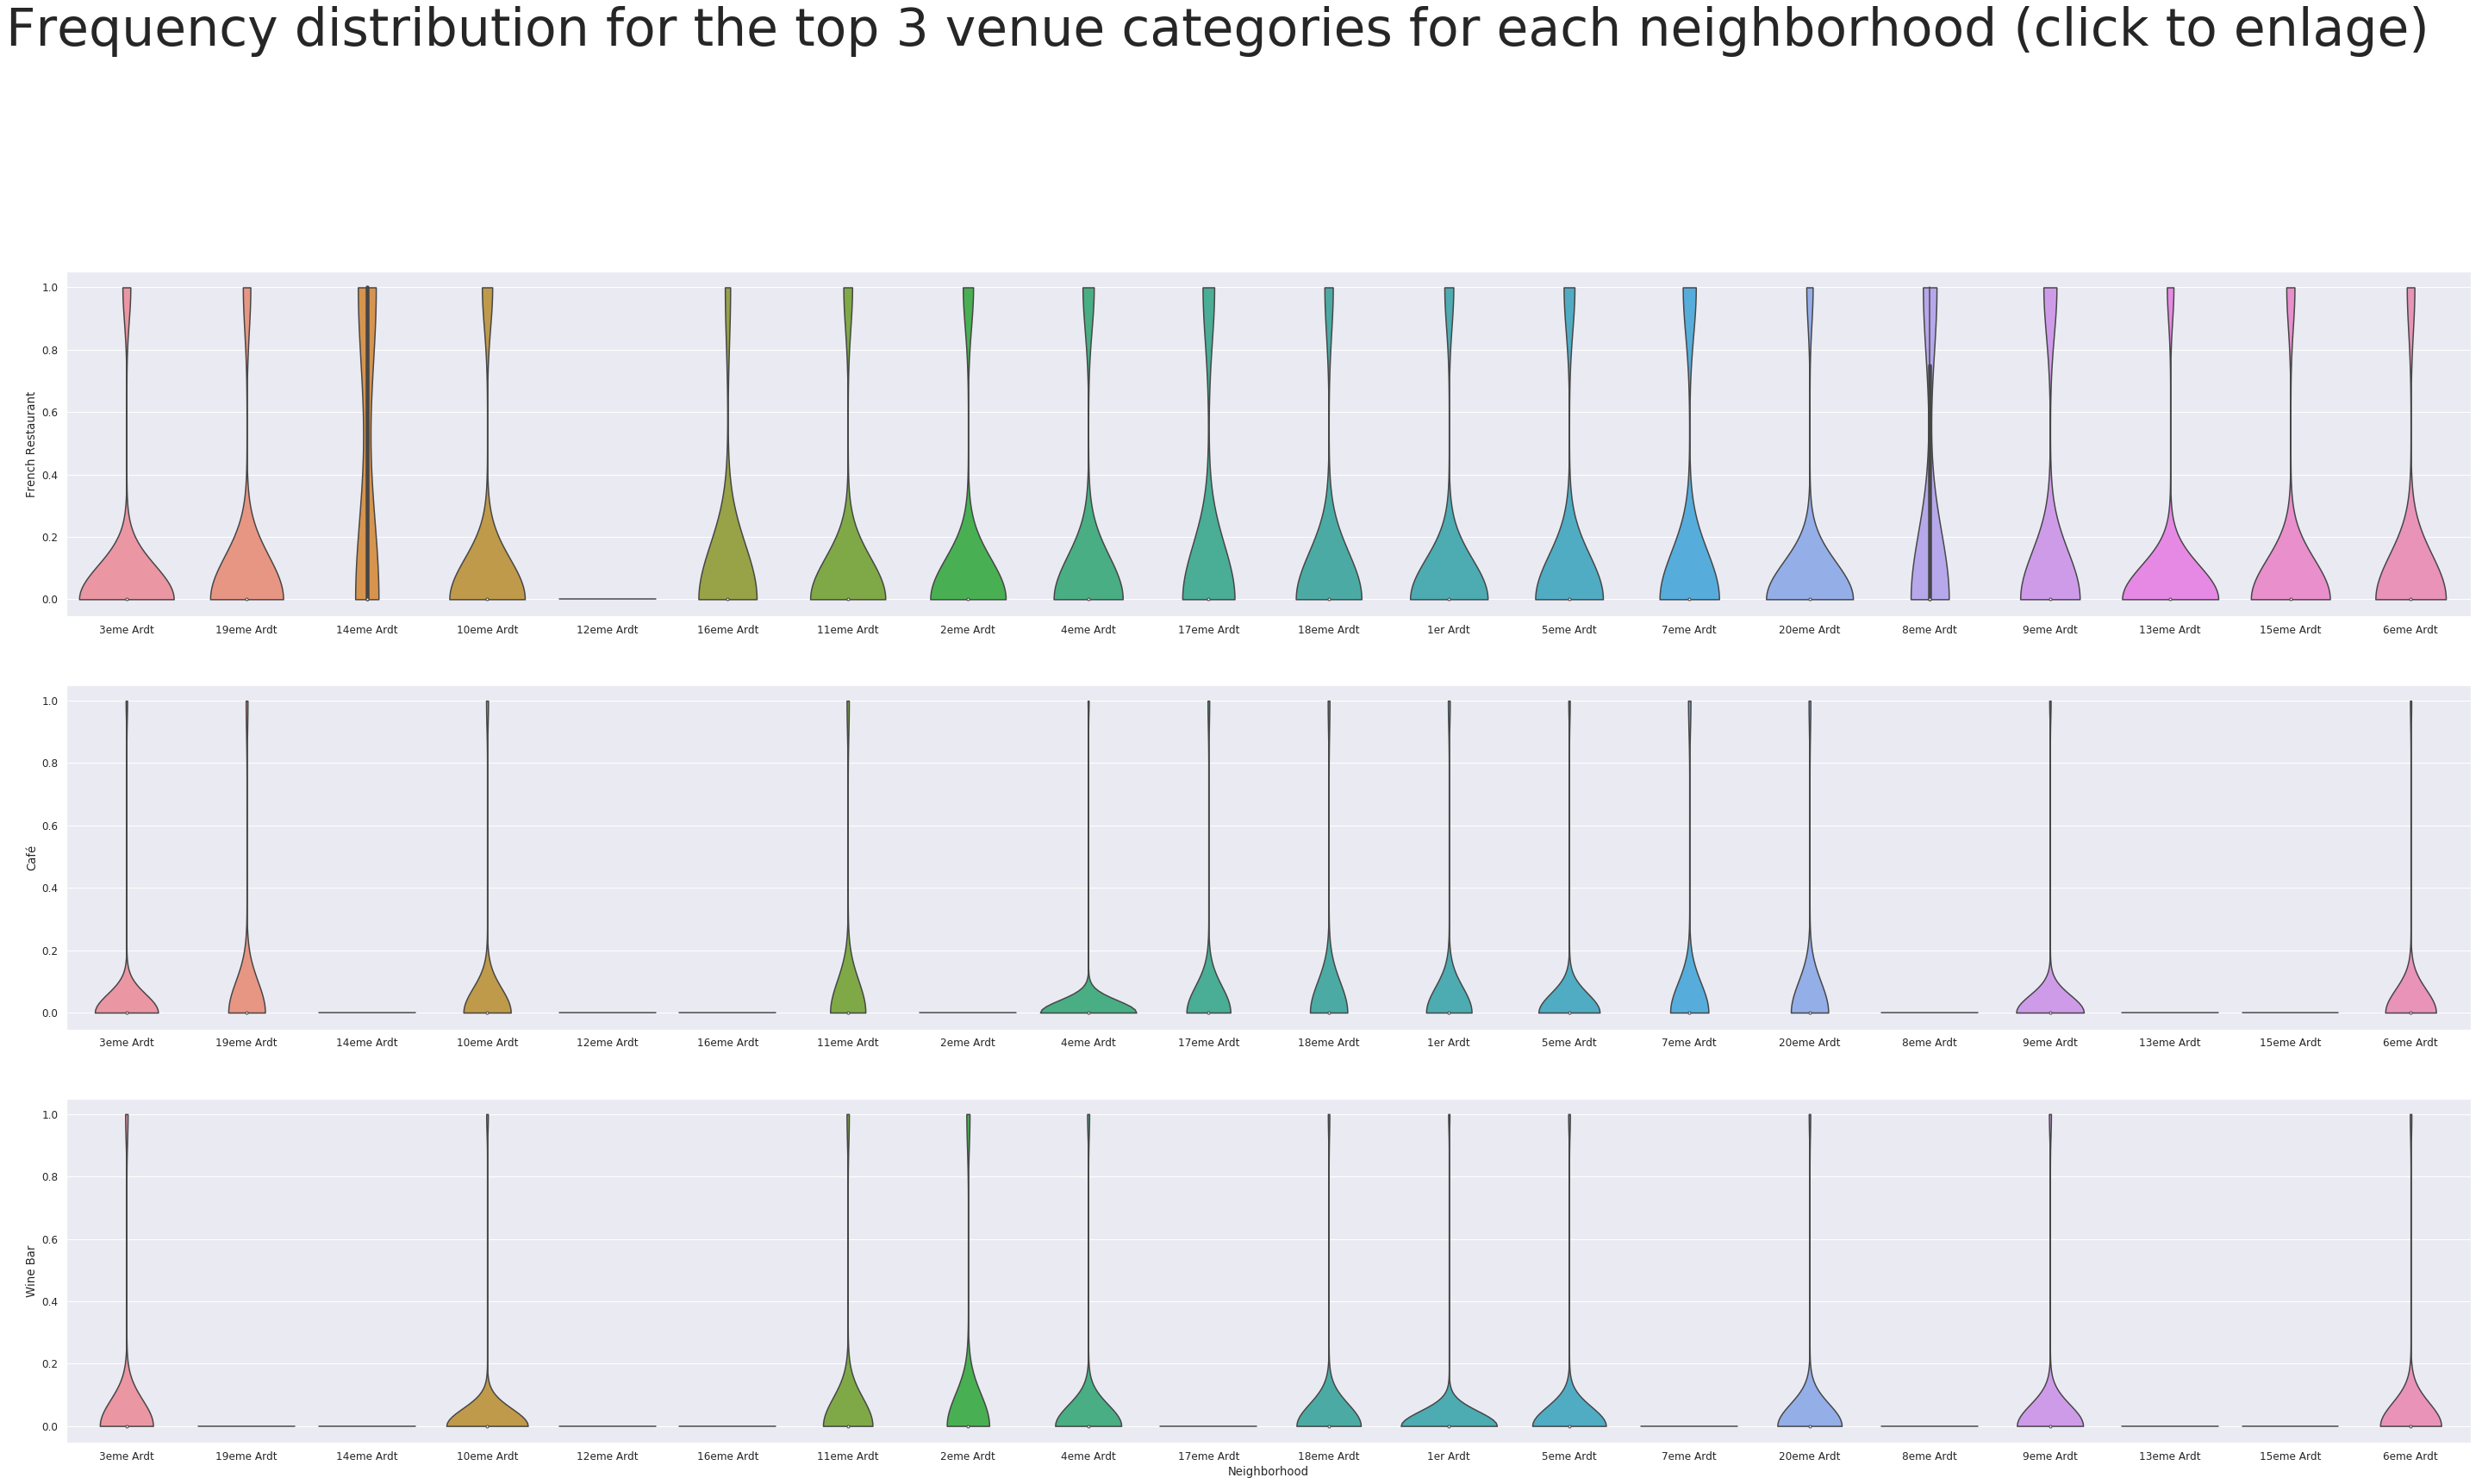

In [32]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

## The Neighborhoods
So as we can see from the analysis there are 8 neighborhoods to open new restuarants - according to the criteria that they have the 3 specified venues in a great frequency (French Restaurants, Cafés and Wine Bars). They are as follows:

#### Neighborhoods

* 3eme Ardt
* 10eme Ardt
* 11eme Ardt
* 4eme Ardt
* 18eme Ardt
* 18eme Ardt
* 5eme Ardt
* 9eme Ardt
* 6eme Ardt

#### Let's take this further with some exploration and Inferential Analysis
We have the 8 neighborhoods that all include the venue category criteria.
But if we included the 'Clothing_Store" venue category into the analysis, then we might be able to make some inferences based on the data, and domain knowledge of marketing and the industry, to focus the list.

#### Let's look at the venue category - ''Restuarants'

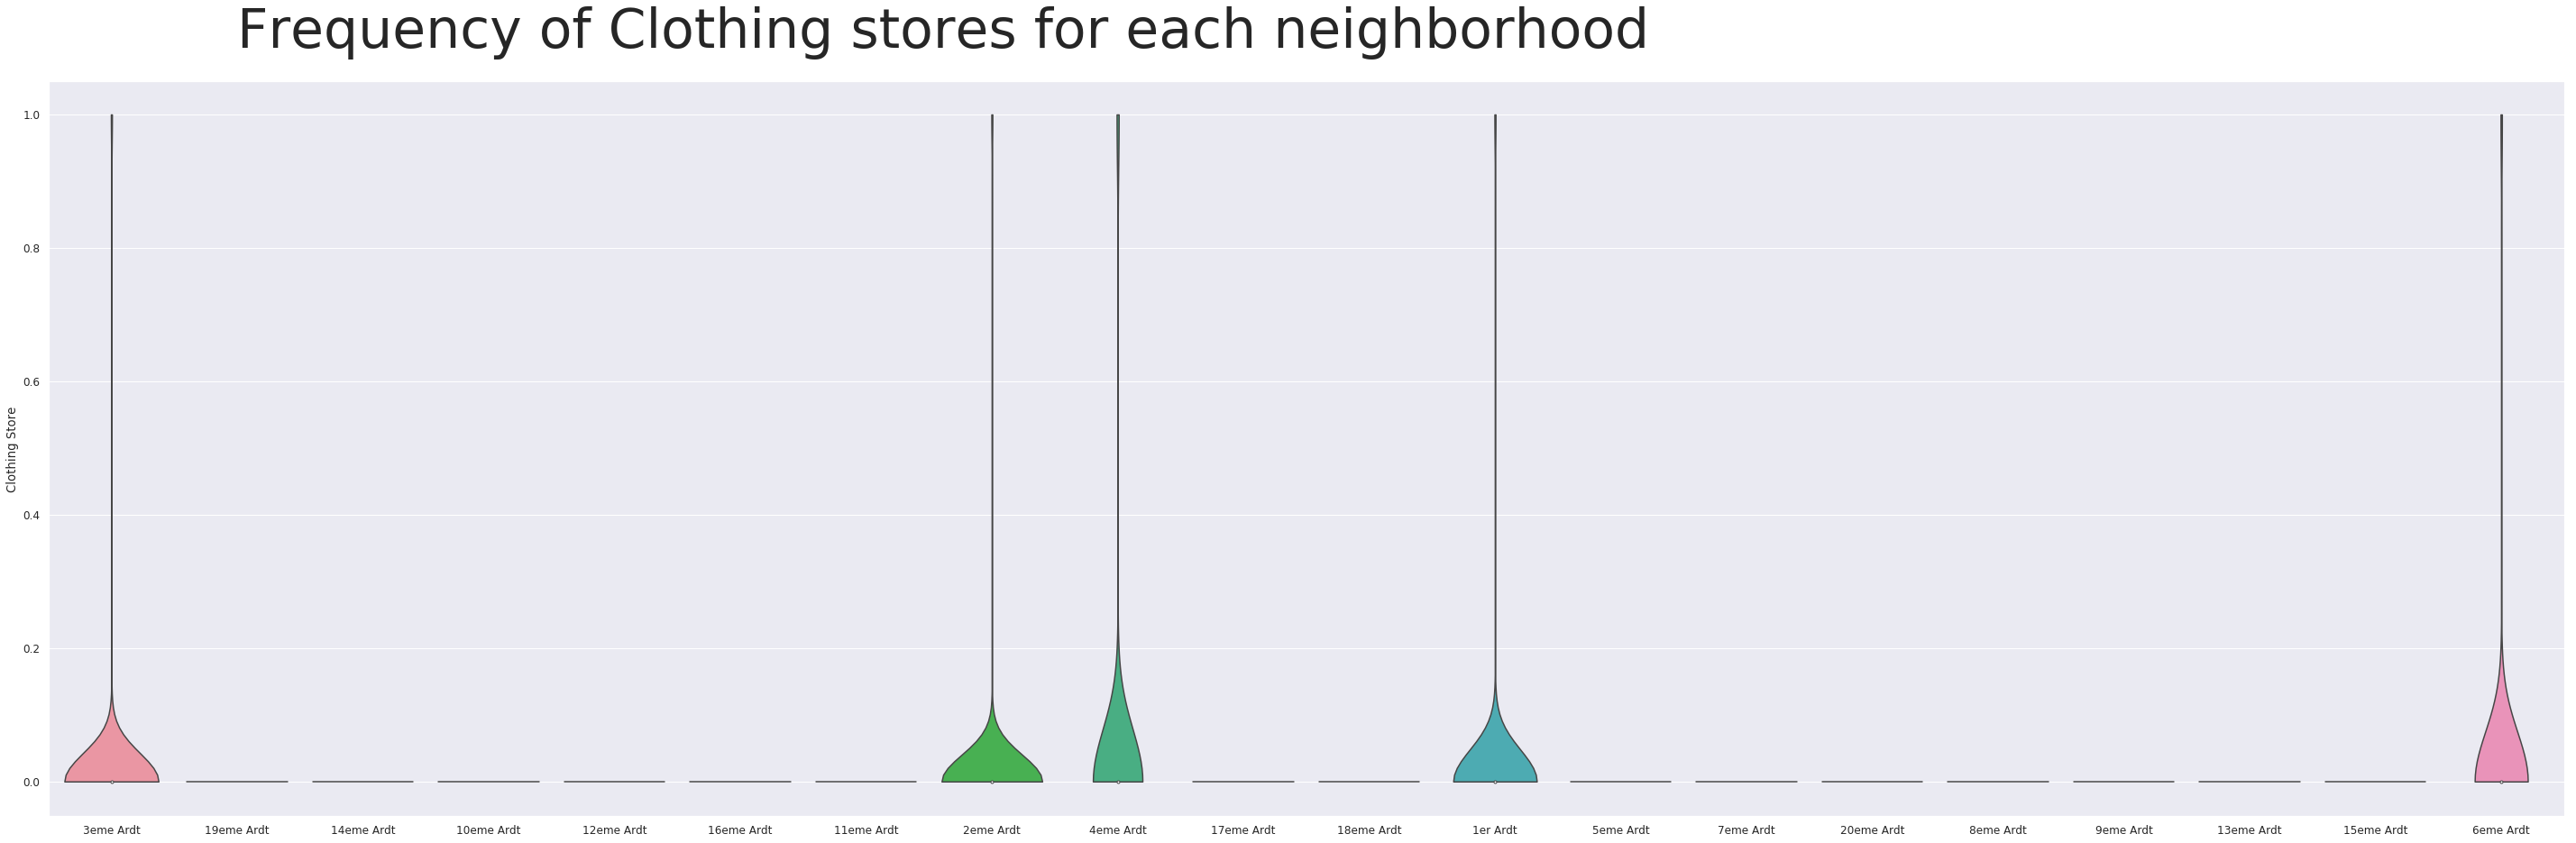

In [38]:
# Add the Clothing_Store to explore this category
import seaborn as sns

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);
plt.xlabel("")

ax.text(1.0, 1.1, 'Frequency of Clothing stores for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Clothing_Venues.png", dpi=240)
plt.show()

So there are 5 neighborhoods that have a significant frequency density of clothing stores.

#### Let's add this to the analysis with the other 3 specified categories as below

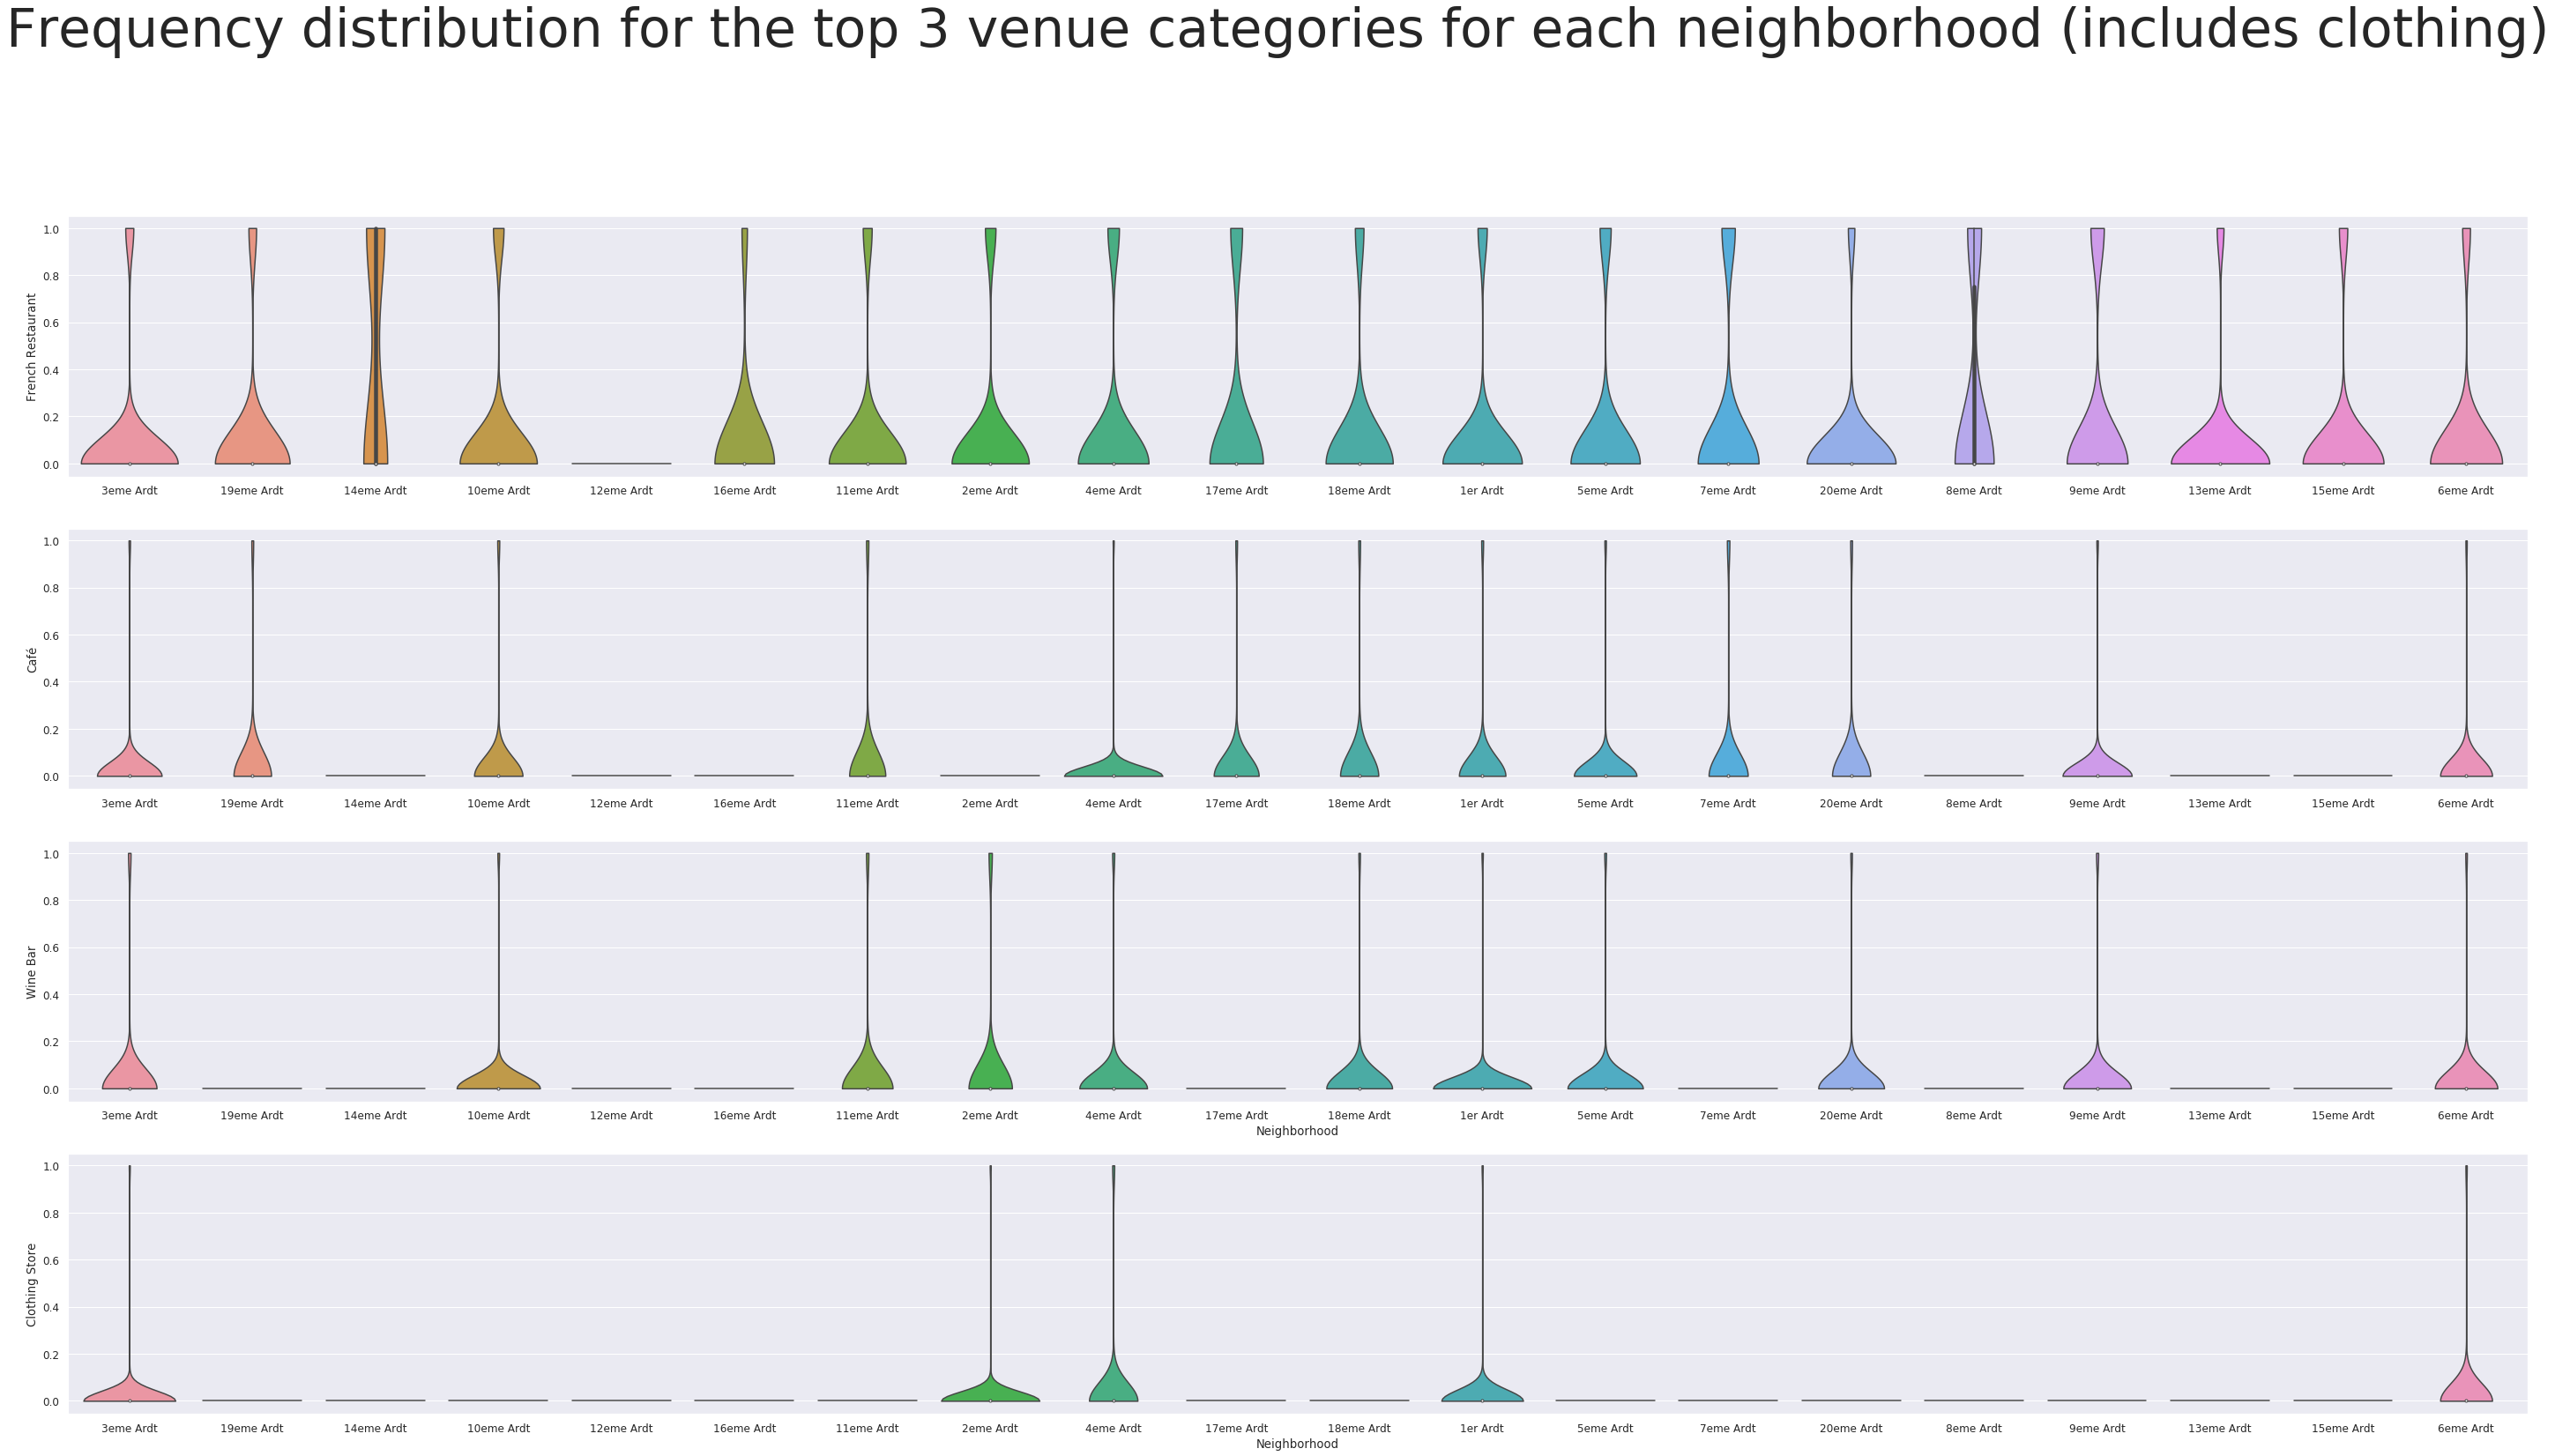

In [35]:
# Restuarants has been added to explore this category and make a comparison

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (includes clothing)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories_clothing.png", dpi=240)
plt.show()

## 4 Inferences and Discussion

### Chosen Neighborhoods - Results

Inferential analysis using the data, as well as domain knowledge of retail and marketing, allow the list to be focussed to just 3 neighbourhoods from the previous 8.

The reasoning being that if the 3 criteria have been met - identifying neighbourhoods that are lively with Restaurants, Cafés and Wine Bars - adding Clothing Stores into the mix of stores in the area is a significant bonus. Having some of the same category of stores in the same area - especially in fashion retail - is very desirable as a retailer.

So we can increase the criteria to include Restaurants, Cafés, Wine Bars and Clothing Stores - which narrows down and focuses the suggested districts for new stores to be located, and at the same time provides better locations for the brand.

So the final 3 prospective neighborhoods for new store locations are where 4 criteria are met:

- 3eme Ardt : Arrondissement 3, Temple
- 4eme Ardt : Arrondissement 4, Hotel-de-Ville
- 6eme Ardt : Arrondissement 6, Luxembourg¶

## Let's look at the 3 districts on a Paris map

In [36]:
# The csv of the 3 chosen prospective neighborhoods was uploaded to GitHub for access and reference
# Download and put into a new dataframe called chosen_districts

chosen_districts = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Week%205/Chosen.csv')
chosen_districts


,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
2,6,Luxembourg,6eme Ardt,48.849130,2.332898


## Where are our chosen districts? Let's visualise them on a map of Paris

In [37]:
# Create a folium map of Paris with the 3 neighborhoods superimposed on the map
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=45,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

## Observations
I guess it's not a surprise that these districts are all very centrally located in the circular arrangement of Paris's arrondissements. Locations fitting the criteria for popular venues would normally be in central locations in many cities of the world.

From this visualisation it is clear that on a practical level, with no data to base decisions on, the circle of the 20 districs is very large, and researching and then visiting them all would be a daunting and time consuming task. We have narrowed the search area down significantly from 20 potential districts to 3 that should suit the client's retail business.

## Inferences
We have made inferences from the data in making the location recommendations, but that is exactly the point. There is no right or wrong answer or conclusion for the task at hand. The job of data analysis here is to steer a course for the location selection of new stores (i) to meet the criteria of being in neighbourhoods that are lively with abundant leisure venues, and (ii) to narrow the search down to just a few of the main areas that are best suited to match the criteria.

## Conclusions
There are many ways this analysis could have been performed based on different methodolgy and perhaps different data sources. I chose the method I selected as it was a straight forward way to narrow down the options, not complicating what is actually simple in many ways – meeting the the critera for the surrounding venues, and in my case, domain knowledge I have on the subject. I originally intended to use the clustering algorythms to cluster the data, but as it progressed it became obvious that this only complicated the task at hand. The analysis and results are not an end point, but rather a starting point that will guide the next part of the process to find specific store locations. The next part will involve domain knowledge of the industry, and perhaps, of the city itself. But the data analysis and resulting recommendations have greatly narrowed down the best district options based on data and what we can infer from it.

Without leveraging data to make focussed decisions, the process could have been drawn out and resulted in new stores opening in sub-standard areas for this retailer. Data has helped to provide a better strategy and way forward, these data-driven decisions will lead to a better solution in the end.